In [1]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/powell-menezes/Graduate-Admission-Prediction/master/Admissions.csv')

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [0]:
#data is clean no null values and missing values

In [0]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [0]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

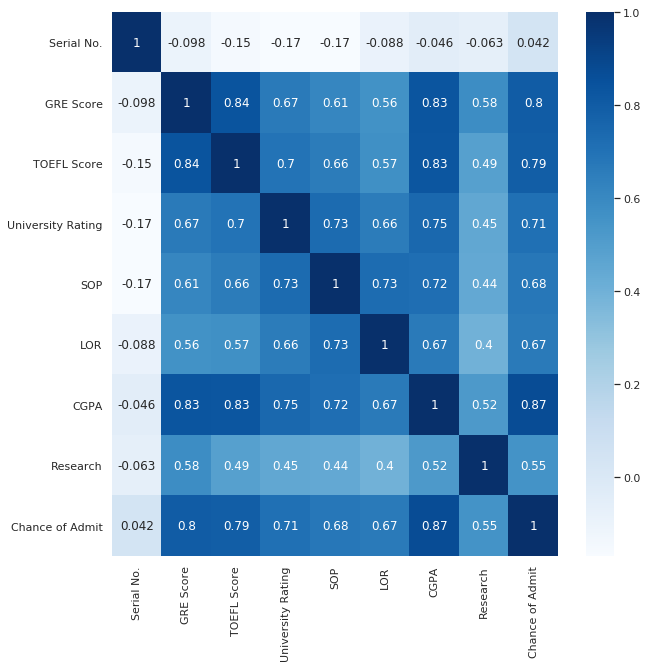

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [0]:
#from visualization top 3 features are CGPA,GRE Score and TOEFL Score

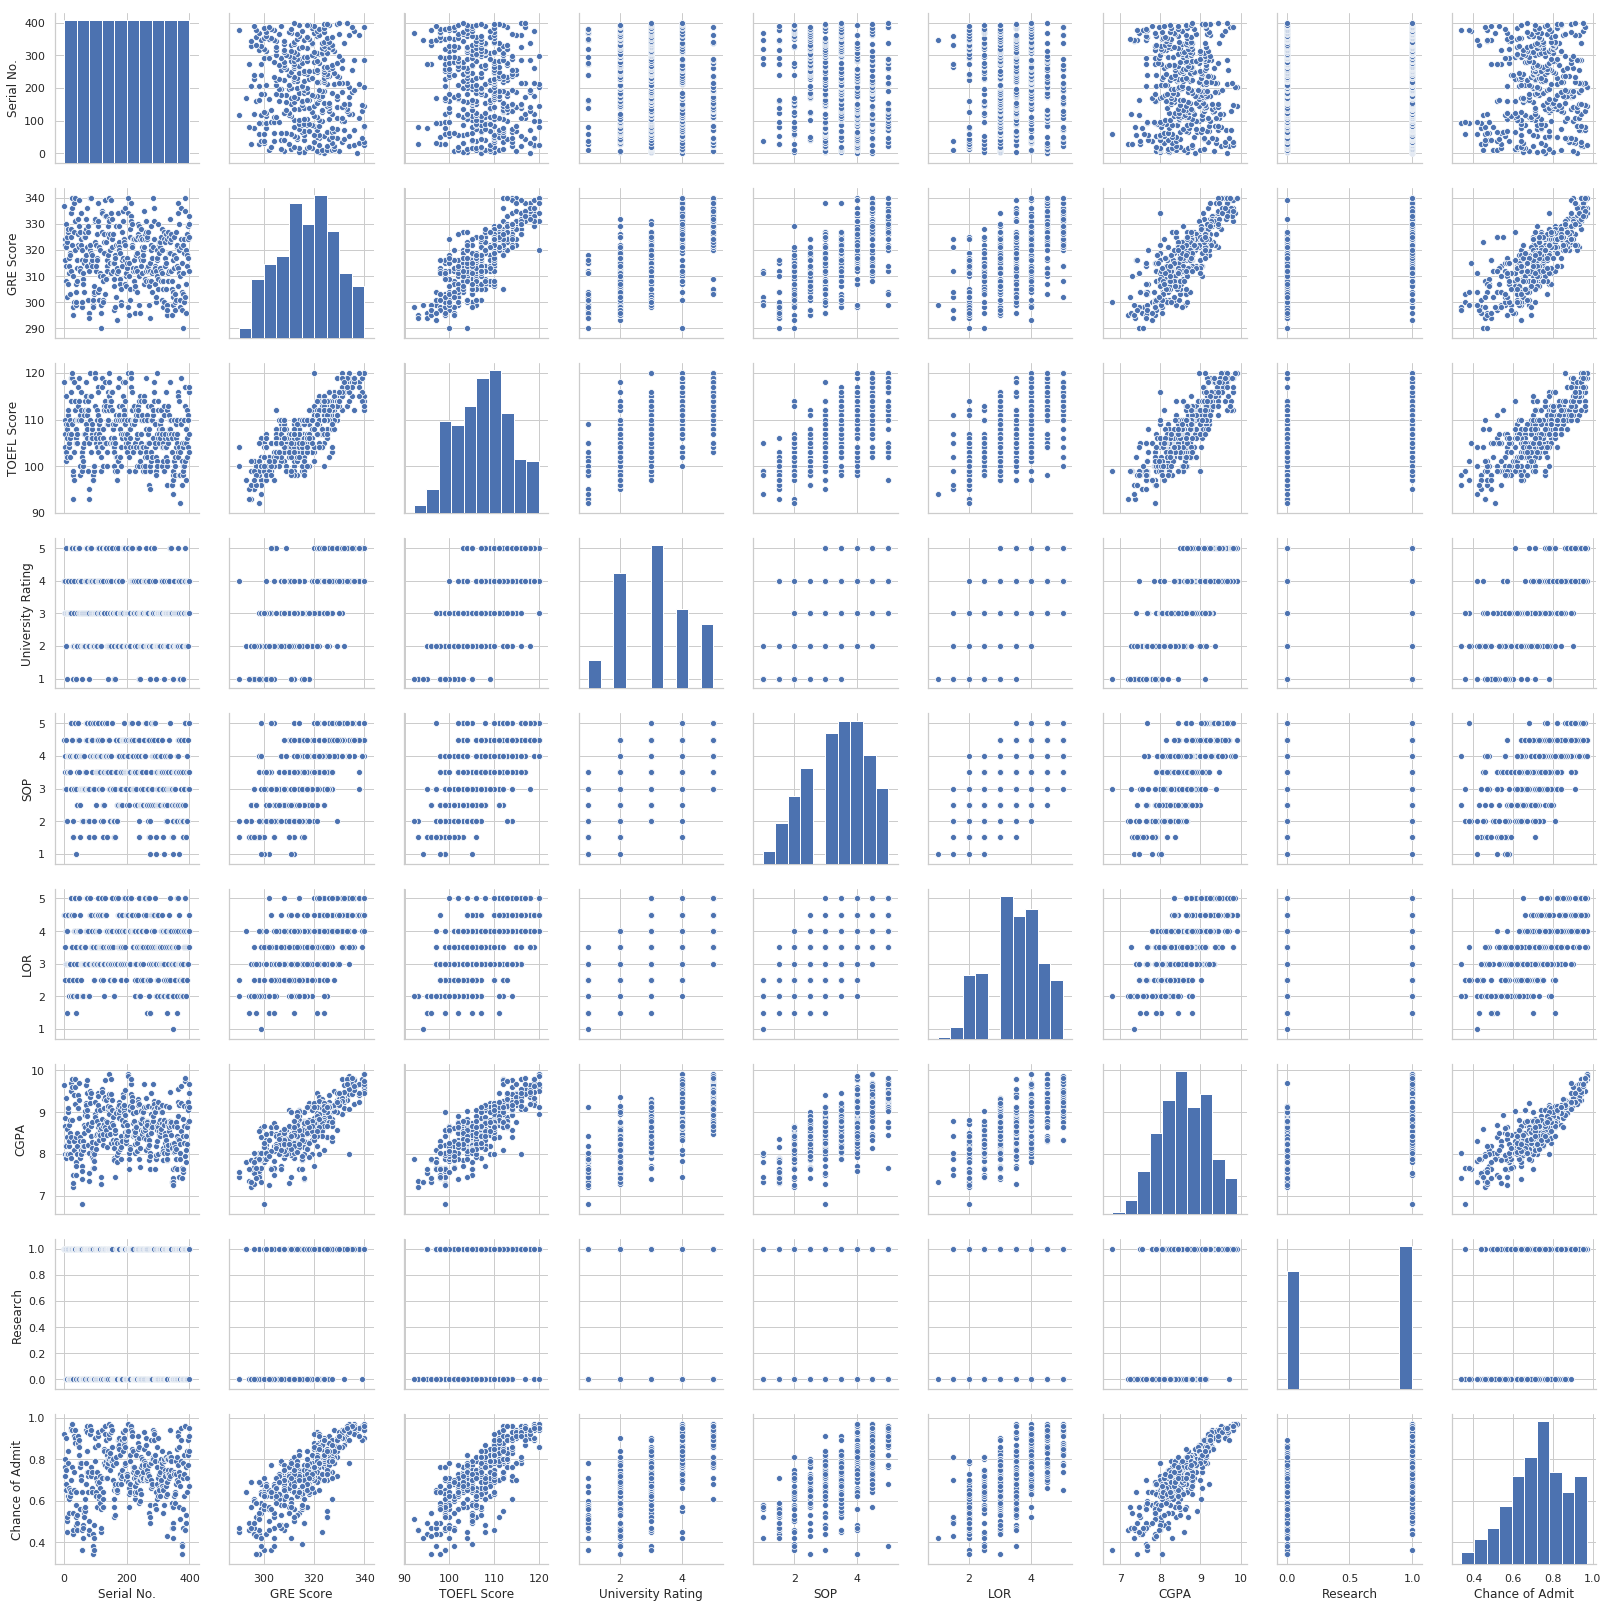

In [0]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

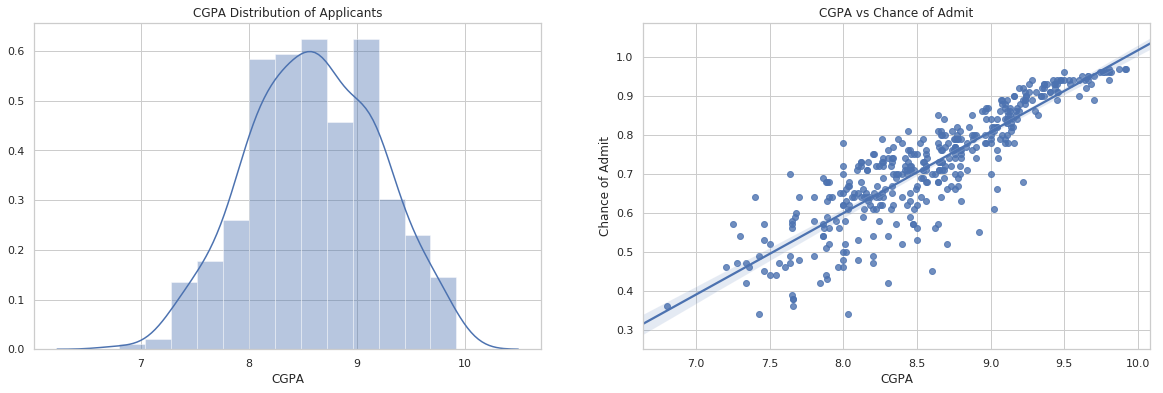

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

In [0]:
#CGPA vs Chance of Admit¶
#It appears as applicant's CGPA has a strong correlation with their chance of admission.

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

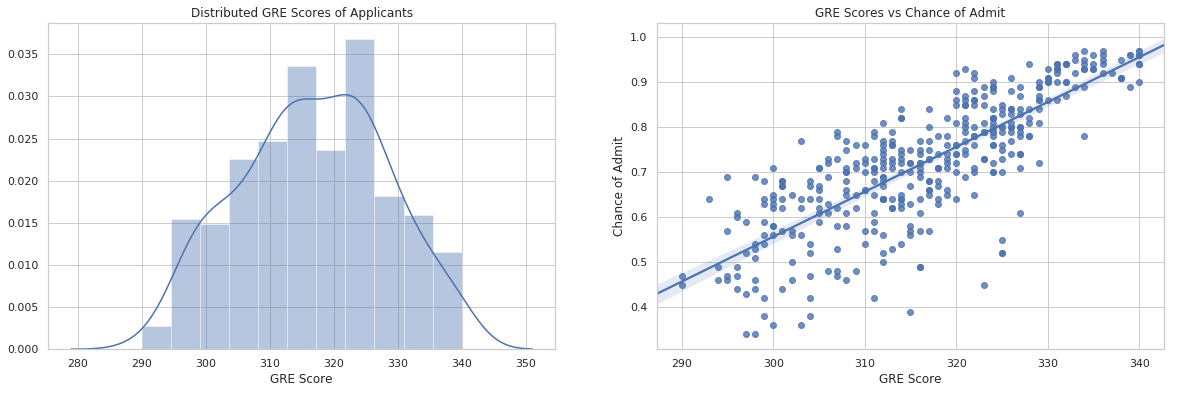

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

# GRE Score vs Chance of Admit¶
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

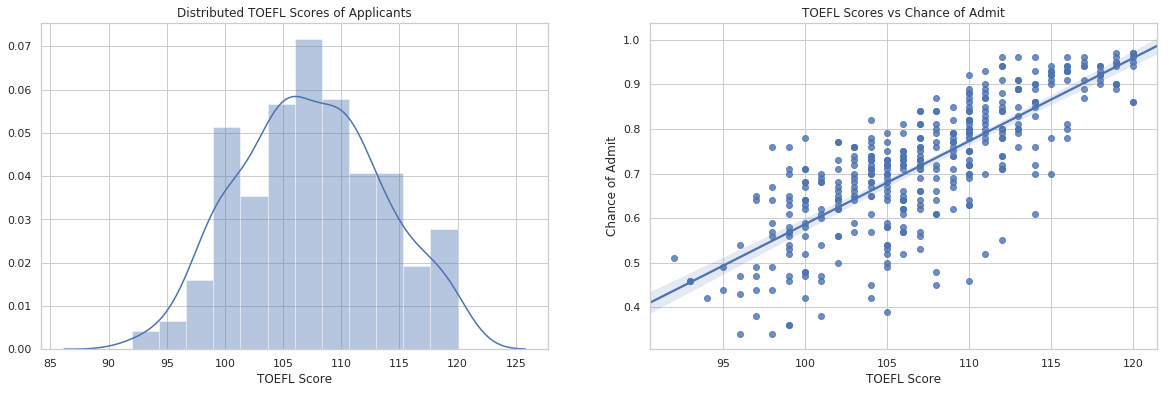

In [0]:


plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

# TOEFL Score vs Chance of Admit
Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.


[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

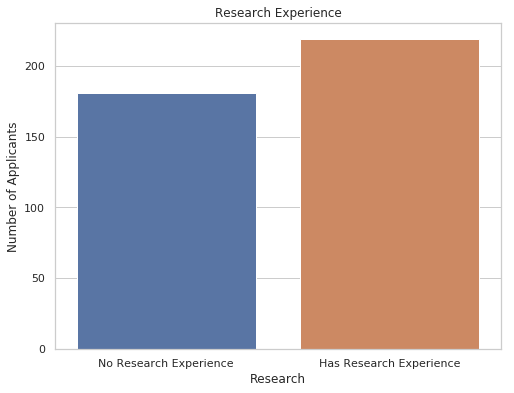

In [0]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

Text(0, 0.5, 'Number of Applicants')

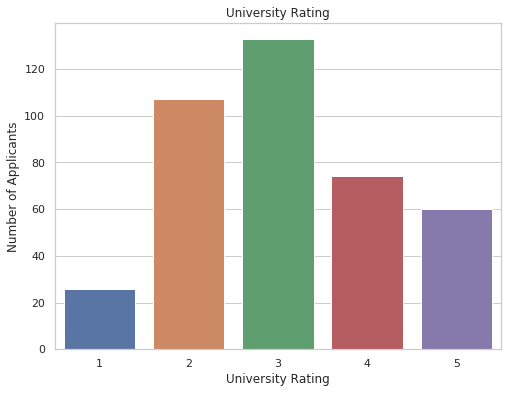

In [0]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [0]:
X=df.drop(['Chance of Admit'],axis=1)

Y=df.iloc[:,-1]


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
cols=X.columns
array=np.asarray(X[cols])
rescaledX = scaler.fit_transform(array)


In [0]:
X= pd.DataFrame(data=rescaledX,columns=cols)
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.000000,4.7,4.642857,3.75,4.375,4.375,4.567308,5.0
1,0.012531,3.4,2.678571,3.75,3.750,4.375,3.317308,5.0
2,0.025063,2.6,2.142857,2.50,2.500,3.125,1.923077,5.0
3,0.037594,3.2,3.214286,2.50,3.125,1.875,2.996795,5.0
4,0.050125,2.4,1.964286,1.25,1.250,2.500,2.259615,0.0


In [0]:
import statsmodels.api as sm
mod = sm.OLS(Y,X)
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2675.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):                        0.00
Time:                        13:59:31   Log-Likelihood:                          357.46
No. Observations:                 400   AIC:                                     -698.9
Df Residuals:                     392   BIC:                                     -667.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [0]:
#pvalue are high for Research, GRE and sop which should be removed. we will try to build a model with 
#different combinations

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

In [0]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(Y_test,predictions)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,predictions)
print(f'R-square= {round(R2*100,2)}% \nMean Squared Error= {"%.10f" %MSE}')

R-square= 72.71% 
Mean Squared Error= 0.0042550872


In [0]:
X=X.drop(['SOP'],axis=1)


In [0]:
from random import shuffle
import math
data=pd.read_csv('drive/My Drive/case study/case study: Graduate Admissions/Admissions.csv')
X=data.drop(['Serial No.','Chance of Admit '],axis=1)
y=data.iloc[:,-1]
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
# use Linear regression to predict target
linreg = LinearRegression()
scaler = preprocessing.StandardScaler()
# fit scaler on training data
scaler = scaler.fit(X_train)
# transform training data using standard scaler
X_train_transformed = scaler.transform(X_train)

# transform test data fit scaler
X_test_transformed = scaler.transform(X_test)

# fit model to training data
linreg = linreg.fit(X_train_transformed, y_train)
# take a look at R^2 score
linreg_score = linreg.score(X_test_transformed, y_test)
print("Linear Regression R^2 score on training set %.4f" %linreg.score(X_train_transformed,y_train))
print("Linear Regression R^2 score on test set     %.4f" %linreg_score)

pred = linreg.predict(X_test_transformed)
linreg_mse = mean_squared_error(y_pred=pred, y_true=y_test)
print("Linear Regression MSE score on training %.4f" %linreg_mse)
print("Linear Regression RMSE %.4f" %math.sqrt(linreg_mse))

# look at coefficients - which variables are most important in model?
linreg_coefs = linreg.coef_
coef_df = pd.DataFrame(data = list(zip(X_train.columns,linreg_coefs)), columns=['feature','coefficient'])
coef_df.sort_values(by = 'coefficient', ascending=False)

Linear Regression R^2 score on training set 0.7948
Linear Regression R^2 score on test set     0.8602
Linear Regression MSE score on training 0.0035
Linear Regression RMSE 0.0595


,feature,coefficient
5,CGPA,0.069014
4,LOR,0.019888
1,TOEFL Score,0.017558
0,GRE Score,0.016815
6,Research,0.013272
2,University Rating,0.007244
3,SOP,-0.002234


In [0]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.3, normalize=True)
rd.fit(X,y)
print('R^2 using Ridge : ',rd.score(X,y))
rmse = np.sqrt(mean_squared_error(rd.predict(X), y))
print('Ridge RMSE: ',rmse)

R^2 using Ridge :  0.7903148591024065
Ridge RMSE:  0.06522111515006049


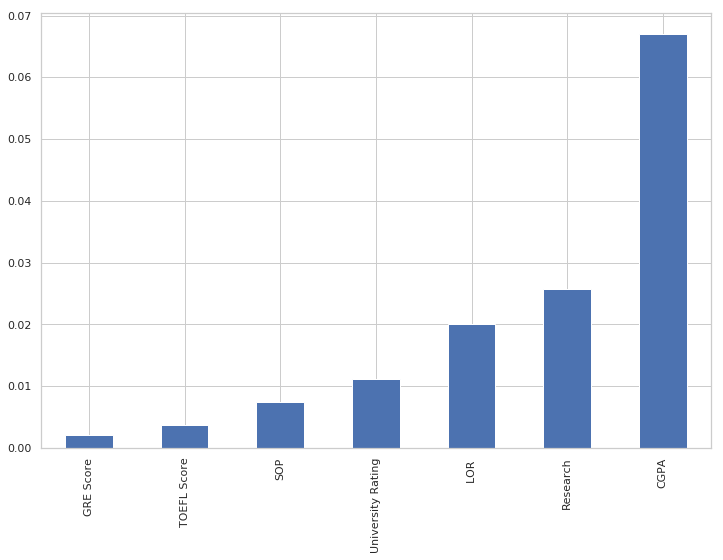

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
ridge=pd.Series(rd.coef_,X.columns).sort_values()
ridge.plot(kind='bar')
plt.show()

In [0]:
from sklearn.linear_model import Lasso
la=Lasso(alpha=0.1, normalize=True)
la.fit(X,y)
print('R^2 using Lasso : ',la.score(X,y))
rmse = np.sqrt(mean_squared_error(la.predict(X), y))
print(' Lasso RMSE: ',rmse)

R^2 using Lasso :  0.0
 Lasso RMSE:  0.1424309569580995


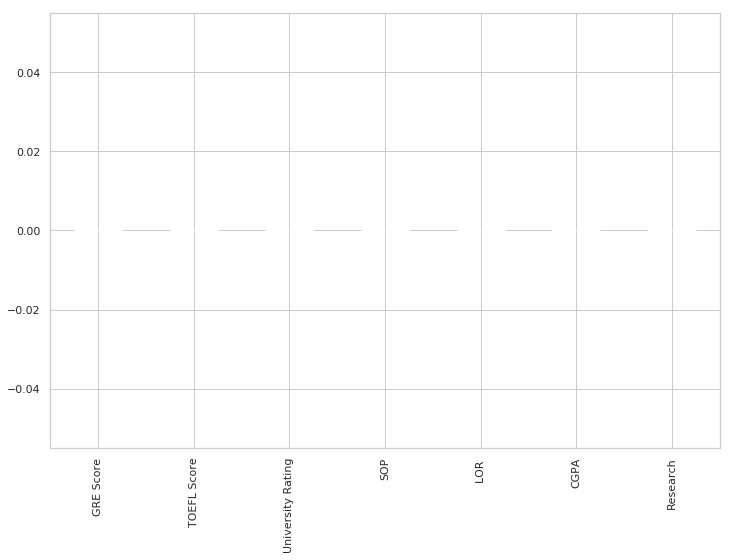

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
lasso=pd.Series(la.coef_,X.columns).sort_values()
lasso.plot(kind='bar')
plt.show()

In [0]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=1)
regr.fit(X, y) 
print('R^2 using ElasticNet : ',regr.score(X,y))
rmse = np.sqrt(mean_squared_error(regr.predict(X), y))
print('ElasticNet  RMSE: ',rmse)

R^2 using ElasticNet :  0.5491807414018663
ElasticNet  RMSE:  0.09563252494859464


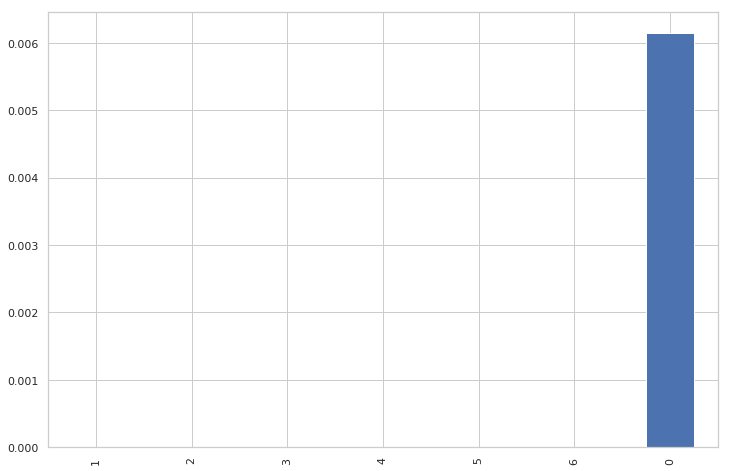

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
elasticNet=pd.Series(regr.coef_).sort_values()
elasticNet.plot(kind='bar')
plt.show()

# comparision
Linear Regression R^2 score on training set 0.7948 test set     0.8602

Linear Regression RMSE 0.0595

R^2 using Ridge for alpha=0.3 :  0.7903148591024065

Ridge RMSE for alpha=0.3:  0.06522111515006047

R^2 using Lasso from aplha ~0.1-0.5 :  0.0

 Lasso RMSE:  0.1424309569580995

R^2 using ElasticNet :  0.5491807414018663

ElasticNet  RMSE:  0.09563252494859464

# when compared to the scores and RMS of different models it is better to go with LinearRegression model

We cannot consider Lasso because its score is 0

When compared Ridge with Linear Regression the RMSE is high in Ridge wherescores are almost same 

as we know we use Ridge and Lasso for regularization where lasso is of no use in this case. 
we should go for Ridge and lasso only if there are more no of features with high correlations